# PROBLEM STATEMENT

Nowadays, the recommendation system has made finding the things easy that we need.Movie
recommendation systems aim at helping movie enthusiasts by suggesting what movie to watch
without having to go through the long process of choosing from a large set of movies which go up to
thousands and millions that is time consuming and confusing. 

Our aim is to reduce the human effort by suggesting movies based on the user’s interests. To handle such problems, we
introduced a model one with popularity-based, content-based and collaborative approach.

TMDB is commumity build Movies and Tv show database website.


## Know your data

### Importing Libraries

In [152]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Importing Data

In [2]:
# Importing datasets using pandas
credits = pd.read_csv('tmdb_5000_credits.csv')
ratings = pd.read_csv('ratings_small.csv')
movies_metadata = pd.read_csv('tmdb_5000_movies.csv')

### First View of Data

In [3]:
# Overview of dataset
movies_metadata.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
# Overview of dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# Overview of dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Data Information

In [6]:
# Overview of dataset
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
# Overview of dataset
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [8]:
# Overview of dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Missing and Dupicate values

In [9]:
# Checking missing values
movies_metadata.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
# Checking missing values
credits.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [11]:
# Checking missing values
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
# Checking duplicate values
movies_metadata.duplicated().sum()

0

In [13]:
# Checking duplicate values
credits.duplicated().sum()

0

- We have 3 csv files naming movies_metadata,credits and ratings
- Credits dataset have cast and crew details
- Ratings have user ratings
- We have missing data in movies_metadata, there is no missing value for other 2 datasets
- No duplicate data

## Understanding variables

In [14]:
# movies meta data columns
movies_metadata.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [15]:
# movies meta data summary
movies_metadata.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Data Wrangling 

In [16]:
# movies_data overview 
movies_metadata.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [17]:
# Renaming column in credits dataset
credits.rename(columns={'movie_id':'id'},inplace = True)

In [18]:
# Merging 2 datasets
df = movies_metadata.merge(credits,on = 'id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
# We have 2 title column so dropping on efrom dataframe
df.drop(columns = ['title_y'],inplace = True)
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [20]:
# Checking genres column 1st row
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [21]:
# Clean the genres column we only need name
def convert(text):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l


In [22]:
# apply covert function on genres column
df['genres'] = df['genres'].apply(convert)

In [23]:
# Checking the changed dataframe
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [24]:
# Checking the keyword column for 1st row
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [25]:
# Apply convert function on keyword column
df['keywords'] = df['keywords'].apply(convert)

In [26]:
# Checking the changed dataframe
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [27]:
# Checking the cast column
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [28]:
# Create function to get top 5 cast 
def top_5_cast(text):
    cast = []
    for i in ast.literal_eval(text):
        cast.append(i['name'])
    return cast[:6]


In [29]:
# Applying function on cast column
df['cast'] = df['cast'].apply(top_5_cast)

In [30]:
# Checking the changed dataframe
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [31]:
# Checking the crew column 1st row
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [32]:
# Extracting the directors name from crew
def extract_director(text):
    directors = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            directors.append(i['name'])
    return directors

In [33]:
# Apply extract director function on crew and creating new column
df['Director'] = df['crew'].apply(extract_director)

In [34]:
# Checking the changed dataframe
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,cast,crew,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski]


In [35]:
# Checking column 
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'cast', 'crew', 'Director'],
      dtype='object')

In [36]:
# Dropping unwanted columns
df.drop(columns = ['homepage','production_companies','production_countries','spoken_languages','status','crew','original_title'],inplace = True)
df.head(2)

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,cast,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]


In [37]:
# Checking shape of dataframe
df.shape

(4803, 16)

- Merged the movies_metadata and credits dataset on id
- Cleaned the dataframe, columns such as genres,keywords,cast,crew
- Created new column named Directors
- dropped some unwanted columns

## Data Exploration and Visualization

In [38]:
# Checking Movie with top 10 High Budget movies
top_10_budget_movies = df.sort_values(by = 'budget', ascending = False).head(10)
plot_top_10_budget = top_10_budget_movies[['title_x','budget']]

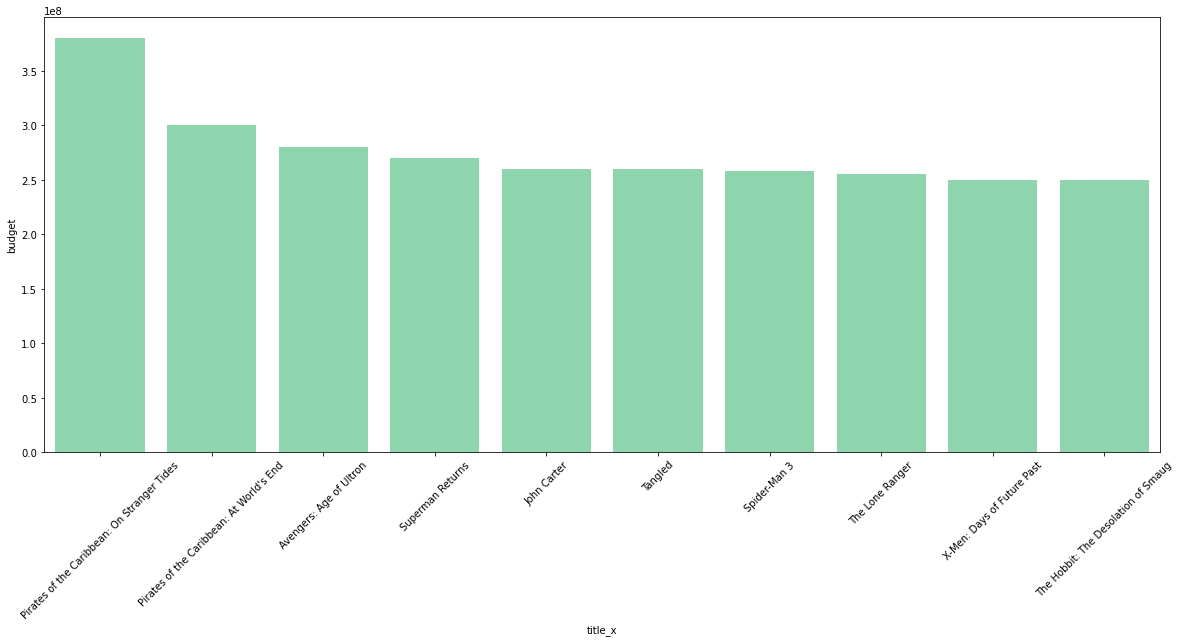

In [39]:
plt.figure(figsize = (20,8))
plt.xticks(rotation=45)
c= '#82E0AA'
sns.barplot(x = plot_top_10_budget['title_x'],y = plot_top_10_budget['budget'],data = plot_top_10_budget, color = c);

Text(0.5, 1.0, 'Histogram of number of votes')

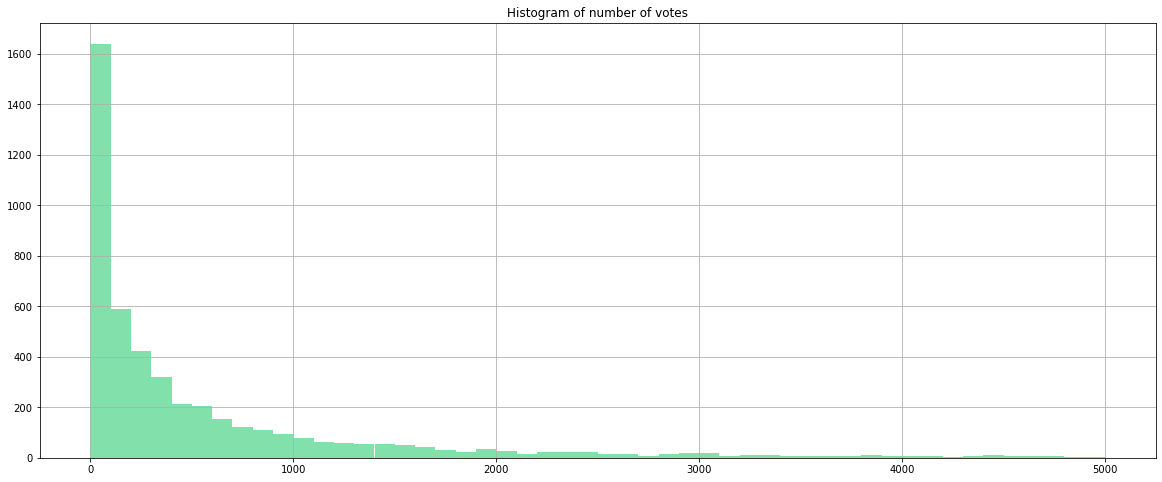

In [40]:
# Histogram of Number of votes 
plt.figure(figsize = (20,8))
c= '#82E0AA'
plt.hist(x = df['vote_count'],bins = 50,range=[0, 5000],color = c);
plt.grid()
plt.title('Histogram of number of votes')



In [41]:
# Movies with highest number of vote
top_10_highest_vote = df.groupby(df['title_x'])['vote_count'].sum().sort_values(ascending=False).reset_index().head(10)

Text(0.5, 1.0, 'Barplot of number of votes')

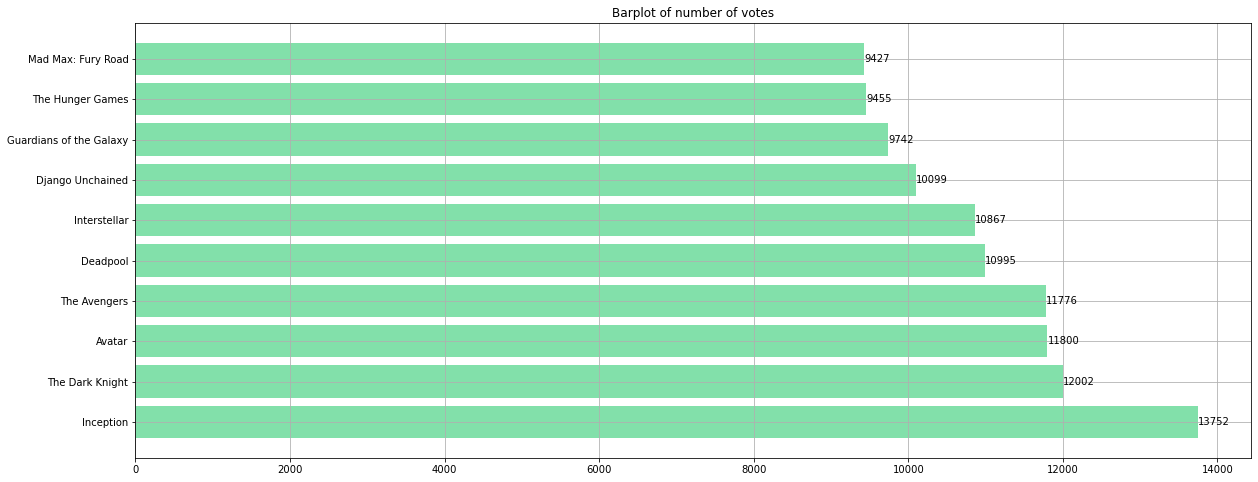

In [42]:
# movies with of Number of votes 
plt.figure(figsize = (20,8))
c = '#82E0AA'
bars = plt.barh(top_10_highest_vote['title_x'], top_10_highest_vote['vote_count'],color = c)
plt.bar_label(bars)
plt.grid()
plt.title('Barplot of number of votes')

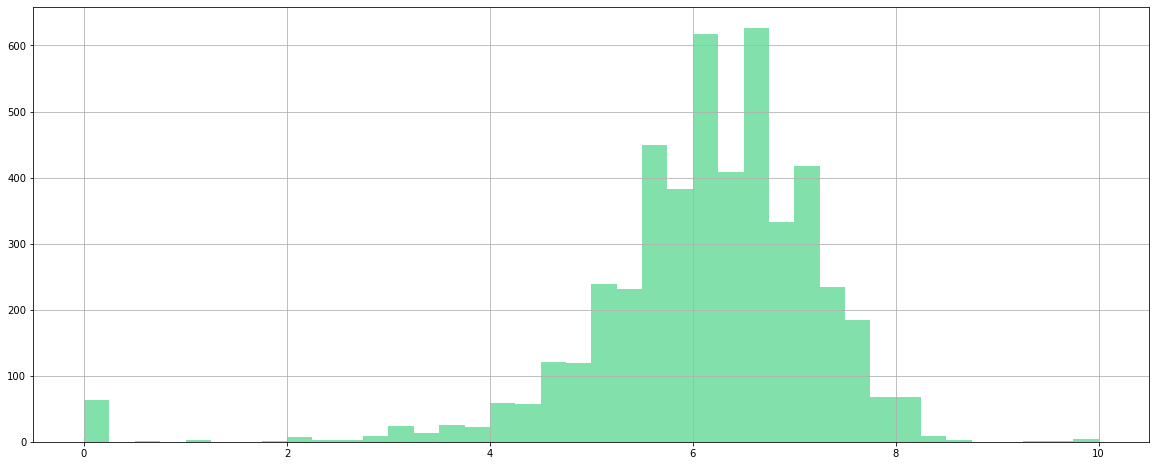

In [43]:
# Histogram vote average
plt.figure(figsize = (20,8))
plt.hist(x = df['vote_average'],color = c,bins = 40);
plt.grid()

In [44]:
# top 5 highest average movies

avg_movies_vote = df.filter(items=['title_x', 'vote_average','vote_count'])
avg_movies_vote = avg_movies_vote[avg_movies_vote['vote_count'] > 400].sort_values(by = 'vote_average',ascending = False).head(5)


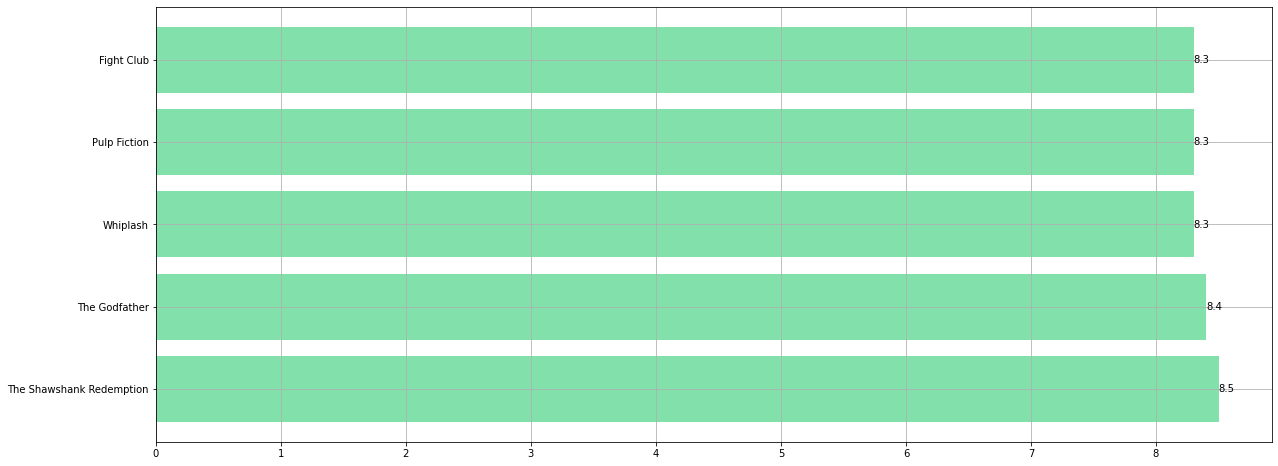

In [45]:
# Plot top 5 highest average movies 
plt.figure(figsize=(20,8))


bars = plt.barh(avg_movies_vote['title_x'], avg_movies_vote['vote_average'],color = c)
plt.bar_label(bars)
plt.grid()



In [46]:
# explode the genres according to genres
genre_df = df.explode('genres')


In [47]:
# number of movies by genres
genres_count = genre_df.groupby(genre_df['genres']).count().sort_values(by = 'id',ascending = False)
genres_count = genres_count['id'].sort_values().reset_index()

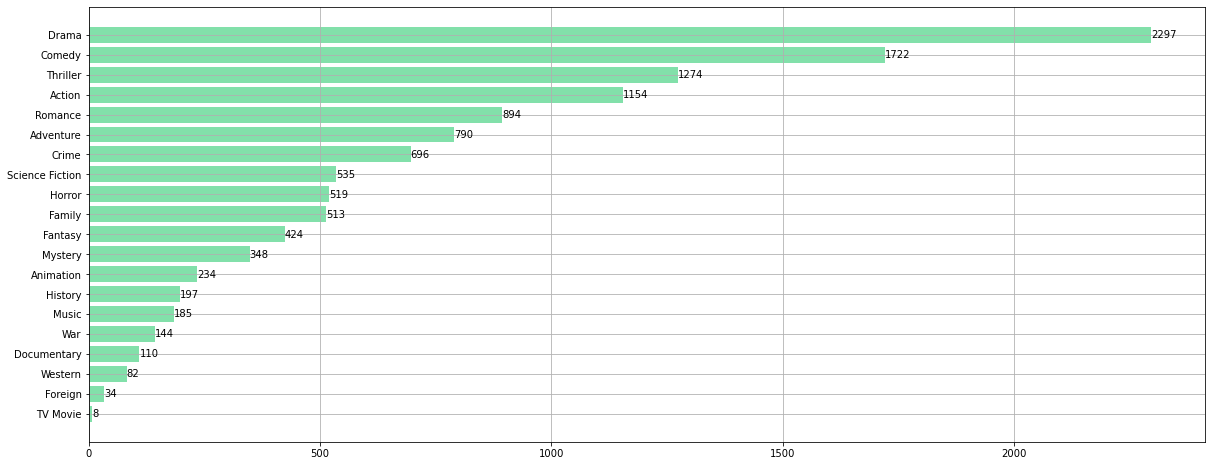

In [48]:
# Plot number of movies by genres
plt.figure(figsize=(20,8))


bars = plt.barh(genres_count['genres'], genres_count['id'],color = c)
plt.bar_label(bars)
plt.grid()


## Popularity Based Recommender System

In [49]:
# Copyed df into new dataframe
df_pb = df.copy()

In [50]:
# Getting overview of new dataframe
df_pb.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,cast,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [51]:
# Calculating the mean votes across movies
C = df_pb['vote_average'].mean()
C

6.092171559442011

In [52]:
# Minimum votes required to be get listed
# Criteria is movie must more votes than 90% of movies in dataset

M = df_pb['vote_count'].quantile(0.9) 
M

1838.4000000000015

In [53]:
# Filtering out movies which have higher votes than 90% of movies
top_vote_movies = df_pb[ df_pb['vote_count'] >= M]
top_vote_movies

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,cast,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[Horror, Mystery, Crime]",176,"[shotgun, based on short film, sadist, pistol,...",en,Obsessed with teaching his victims the value o...,63.655973,2004-10-01,103911669,103.0,Live or die. Make your choice.,Saw,7.2,2184,"[Cary Elwes, Danny Glover, Monica Potter, Mich...",[James Wan]
4300,1200000,"[Crime, Thriller]",500,"[traitor, jewelry, psychopath, thief, heist, b...",en,A botched robbery indicates a police informant...,66.925866,1992-09-02,14661007,99.0,Every dog has his day.,Reservoir Dogs,8.0,3697,"[Harvey Keitel, Tim Roth, Michael Madsen, Chri...",[Quentin Tarantino]
4302,1200000,[Western],429,"[bounty hunter, refugee, gold, anti hero, gall...",it,While the Civil War rages between the Union an...,88.377076,1966-12-23,6000000,161.0,For three men the Civil War wasn't hell. It wa...,"The Good, the Bad and the Ugly",8.1,2311,"[Eli Wallach, Clint Eastwood, Lee Van Cleef, A...",[Sergio Leone]
4337,1300000,"[Crime, Drama]",103,"[vietnam veteran, taxi, obsession, drug dealer...",en,A mentally unstable Vietnam War veteran works ...,58.845025,1976-02-07,28262574,114.0,"On every street in every city, there's a nobod...",Taxi Driver,8.0,2535,"[Robert De Niro, Cybill Shepherd, Harvey Keite...",[Martin Scorsese]


In [54]:
# How many movies we have after filtering
top_vote_movies.shape

(481, 16)

In [55]:
# Creating the weighted average function
def weighted_avg(x, C=C,M=M):

    V = x['vote_count']
    R = x['vote_average']

    return (V / (V + M) * R) + (M / (V + M) * C)

In [56]:
# Applying the function on filtered data

top_vote_movies['imdb_score'] = top_vote_movies.apply(weighted_avg,axis = 1)

C:\Users\VivekPC\AppData\Local\Temp/ipykernel_6528/2302213930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vote_movies['imdb_score'] = top_vote_movies.apply(weighted_avg,axis = 1)


In [57]:
# Getting overview of dataset 
top_vote_movies.head(5)

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,cast,Director,imdb_score
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.050669
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.665696
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.239396
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.346721
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.096368


In [58]:
# Sorting the movies according to there imdb_scores
top_vote_movies = top_vote_movies.sort_values('imdb_score',ascending = False)
top_vote_movies


,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,cast,Director,imdb_score
1881,25000000,"[Drama, Crime]",278,"[prison, corruption, police brutality, prison ...",en,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,"[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",[Frank Darabont],8.059258
662,63000000,[Drama],550,"[support group, dual identity, nihilism, rage ...",en,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,"[Edward Norton, Brad Pitt, Meat Loaf, Jared Le...",[David Fincher],7.939256
65,185000000,"[Drama, Action, Crime, Thriller]",155,"[dc comics, crime fighter, secret identity, sc...",en,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,Why So Serious?,The Dark Knight,8.2,12002,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",[Christopher Nolan],7.920020
3232,8000000,"[Thriller, Crime]",680,"[transporter, brothel, drug dealer, boxer, mas...",en,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,"[John Travolta, Samuel L. Jackson, Uma Thurman...",[Quentin Tarantino],7.904645
96,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",27205,"[loss of lover, dream, kidnapping, sleep, subc...",en,"Cobb, a skilled thief who commits corporate es...",167.583710,2010-07-14,825532764,148.0,Your mind is the scene of the crime.,Inception,8.1,13752,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...",[Christopher Nolan],7.863239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,200000000,"[Adventure, Action, Thriller, Science Fiction]",44912,"[dc comics, transformation, superhero, alien, ...",en,"For centuries, a small but powerful force of w...",51.872839,2011-06-16,219851172,114.0,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,"[Ryan Reynolds, Blake Lively, Peter Sarsgaard,...",[Martin Campbell],5.521697
337,92000000,"[Action, Thriller]",47964,"[bomb, cia, russia, escape, courthouse, rogue,...",en,"Iconoclastic, take-no-prisoners cop John McCla...",65.402595,2013-02-06,304654182,98.0,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,"[Bruce Willis, Jai Courtney, Sebastian Koch, M...",[John Moore],5.507643
193,130000000,"[Science Fiction, Action, Adventure]",82700,[dystopia],en,One thousand years after cataclysmic events fo...,42.840582,2013-05-30,243843127,100.0,"Danger is real, fear is a choice",After Earth,5.0,2532,"[Jaden Smith, Will Smith, Sophie Okonedo, Zoë ...",[M. Night Shyamalan],5.459420
91,165000000,"[Action, Adventure, Science Fiction]",47933,"[alternate history, alien invasion]",en,We always knew they were coming back. Using re...,48.775723,2016-06-22,389681935,120.0,We had twenty years to prepare. So did they.,Independence Day: Resurgence,4.9,2491,"[Liam Hemsworth, Jeff Goldblum, Bill Pullman, ...",[Roland Emmerich],5.406234


In [59]:
# Getting top 10 Movies on popularity basis
top_vote_movies[['title_x','vote_count','vote_average','imdb_score']].head(15).reset_index()

,index,title_x,vote_count,vote_average,imdb_score
0,1881,The Shawshank Redemption,8205,8.5,8.059258
1,662,Fight Club,9413,8.3,7.939256
2,65,The Dark Knight,12002,8.2,7.920020
3,3232,Pulp Fiction,8428,8.3,7.904645
4,96,Inception,13752,8.1,7.863239
5,3337,The Godfather,5893,8.4,7.851236
6,95,Interstellar,10867,8.1,7.809479
7,809,Forrest Gump,7927,8.2,7.803188
8,329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
9,1990,The Empire Strikes Back,5879,8.2,7.697884


In [60]:
# Getting trending movies based on popularity

trending_movies = df_pb.sort_values('popularity',ascending = False)

In [61]:
# Top 10 Trending movies
top_10_trending_movies = trending_movies[['title_x','popularity']].head(10)

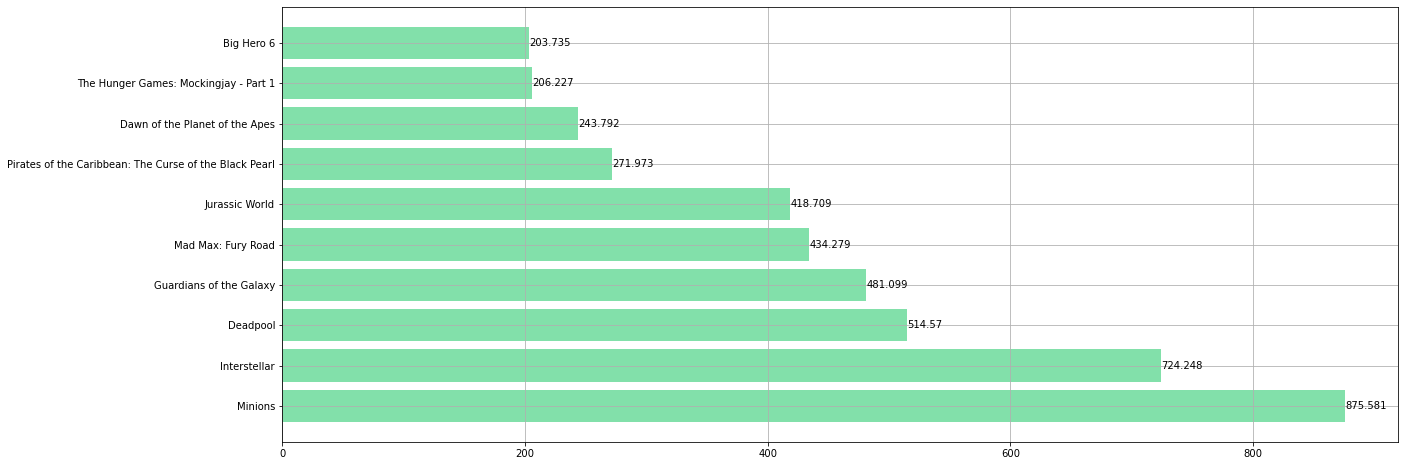

In [62]:
# Plotting trending movies
# Plot number of movies by genres
plt.figure(figsize=(20,8))


bars = plt.barh(top_10_trending_movies['title_x'], top_10_trending_movies['popularity'],color = c)
plt.bar_label(bars)
plt.grid()


## Content Based Filtering

### Data Preparation 

In [159]:
# Copying data to new datframe
df_cf = df.copy()

In [160]:
# Overview of new data
df_cf.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,tagline,title_x,vote_average,vote_count,cast,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [161]:
# Checking total null values in each column
df_cf.isna().sum()

budget                 0
genres                 0
id                     0
keywords               0
original_language      0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
tagline              844
title_x                0
vote_average           0
vote_count             0
cast                   0
Director               0
dtype: int64

In [162]:
# Getting only required columns
df_cf = df_cf.filter(items=['id','overview', 'title_x','genres','keywords','cast','Director'])

In [163]:
# Checking the info about dataframe
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4803 non-null   int64 
 1   overview  4800 non-null   object
 2   title_x   4803 non-null   object
 3   genres    4803 non-null   object
 4   keywords  4803 non-null   object
 5   cast      4803 non-null   object
 6   Director  4803 non-null   object
dtypes: int64(1), object(6)
memory usage: 429.2+ KB


In [164]:
# Dropping null values
df_cf.dropna(inplace = True)


In [165]:
# Checking what is inside the overview column
df_cf['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4800, dtype: object

In [166]:
# Spliting the each word, these will help in vectorization
df_cf['overview'] = df_cf['overview'].apply(lambda x:x.split())

In [167]:
# Checking cast column
df_cf['cast'][0]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez',
 'Giovanni Ribisi']

We have to join the name as model should actor 'Sam Worthington' as one entity

In [168]:
# Creating function to join the name as one entity

def join_name(text):
    J = []

    for i in text:
        J.append(i.replace(' ', ''))
        
    return J


In [169]:
# Appling joining function on column
df_cf['cast'] = df_cf['cast'].apply(join_name)

In [170]:
# Checking Direcctor
df_cf['Director']

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4798                          [Robert Rodriguez]
4799                              [Edward Burns]
4800                               [Scott Smith]
4801                               [Daniel Hsia]
4802    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: Director, Length: 4800, dtype: object

In [171]:
# Appling joining function on column
df_cf['Director'] = df_cf['Director'].apply(join_name)

In [172]:
# Checking genres column
df_cf['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [173]:
# Appling joining function on column
df_cf['genres'] = df_cf['genres'].apply(join_name)

In [174]:
# Checking keywords column
df_cf['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [175]:
# Appling joining function on column
df_cf['keywords'] = df_cf['keywords'].apply(join_name)

In [176]:
# Combine columns to make one column
df_cf['tags'] = df_cf['overview'] + df_cf['genres'] + df_cf['cast'] + df_cf['Director'] + df_cf['keywords']

In [177]:
# Checking new column in dataframe
df_cf.head()

,id,overview,title_x,genres,keywords,cast,Director,tags
0,19995,"[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[A, cryptic, message, from, Bond’s, past, send...",Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Following, the, death, of, District, Attorney...",The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[John, Carter, is, a, war-weary,, former, mili...",John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [178]:
# Convert to array of string
df_cf['tags'] = df_cf['tags'].apply(lambda x: ' '.join(x))

### Model Building

In [179]:
# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [180]:
#TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_cf['tags'])

In [181]:
# Shape of the matrix
tfidf_matrix.shape

(4800, 41117)

In [182]:
# We are using cosine similarity to get similar movies
similarity = cosine_similarity(tfidf_matrix)

In [183]:
similarity.shape

(4800, 4800)

In [184]:
# Now it has became 4800 vs 4800 matrix 
similarity[0]

array([1.        , 0.01340503, 0.00723186, ..., 0.00299146, 0.00327545,
       0.        ])

In [189]:
# Getting the index of the movie
df_cf[df_cf['title_x'] == 'Batman' ].index[0]

1359

In [190]:
# Getting similar movies for particular index 
sorted(similarity[1362],reverse = True)[0:5]

[1.0000000000000002,
 0.1114977300710726,
 0.10821469443755712,
 0.07824890205824085,
 0.07748723393813073]

In [191]:
# Getting index and similarity score 
sorted(list(enumerate(similarity[0])),reverse = True,key = lambda x:x[1])[1:6]

[(2403, 0.12825430938209353),
 (582, 0.1164586822775199),
 (47, 0.107554403027141),
 (3723, 0.10667249958282102),
 (3603, 0.10635948432144662)]

In [196]:
# Building the function to get movie recommendation system
def recommendation(movie):
    # Getting movie index for user_input
    movie_index = df_cf[df_cf['title_x'] == movie].index[0]

    # Getting similarity score / distance in sorted form
    distances = similarity[movie_index]

    # Getting movie index and similarity score top 5 list similar to user_input
    movie_list = sorted(list(enumerate(distances)),reverse = True,key = lambda x:x[1])[1:6]
    
    # Printing out the title of top 5 similar movies to user_input
    for i in movie_list:
        print(df_cf.iloc[i[0]].title_x)

In [197]:
# Checking our function
recommendation('Batman')

Batman & Robin
Batman Returns
The Dark Knight Rises
The Dark Knight
Batman Begins


## Collaborative Based Filtering

In [200]:
# Loading rating csv file
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
